# `spearmint` Basics

## Observations data
Spearmint takes as input a [pandas](https://pandas.pydata.org/) `DataFrame` containing experiment observations data. Each record represents an observation/trial recorded in the experiment and has the following columns:

- **One or more `treatment` columns**: each treatment column contains two or more distinct, discrete values that are used to identify the different groups in the experiment
- **One or more `metric` columns**: these are the values associated with each observation, and are used as the metric to compare groups in the experiment.
- **Zero or more `attributes` columns**: these define additional discrete properties assigned to the observations. These attributes can be used to perform additional segmentation across groups.

To demonstrate, let's generate some fake experiment observations data. The `metric` column--also named `"metric"`--is a series of binary outcomes (i.e. `True`/`False`). This binary `metric` is analogous to *conversion* or *success* in AB testing.


---
> 💡 These fake observations are simulated from 3 different [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)s, with each distribution being associated with each of the the three `treatment`s (`"A"`, `"B"`, or `"C"`), and each distribution having increasing average probability of *conversion*.

---

In [1]:
import numpy as np
from spearmint.utils import generate_fake_observations
from spearmint import Experiment, HypothesisTest

experiment_observations = generate_fake_observations(
    distribution="bernoulli",
    n_treatments=3,
    n_attributes=4,
    n_observations=120,
    random_seed=123
)
experiment_observations.head()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

,id,treatment,metric,attr_0,attr_1,attr_2,attr_3
0,0,C,True,A0a,A1b,A2a,A3a
1,1,B,True,A0a,A1b,A2a,A3b
2,2,C,True,A0a,A1a,A2a,A3b
3,3,C,True,A0a,A1a,A2a,A3b
4,4,A,True,A0a,A1b,A2a,A3a


The fake data's `treatment` column is named `"treatment"`, and the dataset also contains four `attribute` columns, named `"attr_*"`, that can potentially be used for segmentation.

## Running an AB test in `spearmint` is as easy as 1-2-3:

The three key components of running an AB test in `spearmint` are:

- 1. Initialize an **`Experiment`**, which holds the raw observations, and any metadata associated with an AB experiment.
- 2. Define the **`HypothesisTest`**, which declares the configuration of the statistical inference procedure.
- 3. Run the `HypothesisTest` against the `Experiment` and interpret the resulting **`InferenceResults`**. `InferenceResults`, hold the parameter estimates of the inference procedure, and are used to summarize, visualize, and save the results of the hypothesis test.

## Example Workflow

We'll demonstrate the basic workflow with an examples.

### 1. Initialize an `Experiment`

In [2]:
experiment = Experiment(data=experiment_observations)

### 2. Initialize the `HypothesisTest`

Spearment allows the scientist to configure many aspects of the hypothesis test, including
- the specific `metric` used -- we can even use `CustomMetrics` that are derived from multiple columns of the dataset (see below)
- `control` and `variation` groups. The `control` group can be thought of as the baseline or NULL hypothesis group.
- the specific `hypothesis`
- `variable_type` -- this can be explicitly configured, otherwise `spearmint` will attempt to infer it from the distribution of the `metric` values
- `inference_method`, and any specific configuration for the `inference_method` (particularly helpful when specifying priors in Bayesian hypothesis tests).

In [3]:
ab_test = HypothesisTest(
    metric="metric",
    treatment="treatment",
    control="A", variation="B",
    hypothesis="unequal",
    variable_type="binary",
    inference_method="frequentist"
)

#### Specifying the `hypothesis`
| `hypothesis`  | Hypothesis Interpretation | Hypothesis Type | 
|---|---|---|
| `"larger"` (default) | "The treatment is larger than the control" | one-tailed |
| `"smaller"` | "The treatment is smaller than the control" | one-tailed |
| `"unequal"` | "The treatment is not equal to the control" | two-tailed |

In this example, we specify the `"unequal"` hypothesis, which tests for any statistically significant difference between groups `"A"` and `"B"`. Therefore `"B"` could be smaller or larger than `"A"`, and the test could pass if the difference is large enough. 

---

> 💡 Note that we can also exclude the `hypothesis` argument, in which case `spearmint` will use the value configured in `$SPEARMINT_HOME/spearmint.cfg::hypothesis_test::default_hypothesis`. See the **Configuring `spearmint`** section below

---

#### Specifying the `variable_type`s and `inference_method`s

The the specific inference procedure used will depend on the `variable_type` of the observations, and the `inference_method` argument. A list of supported `variable_type`s and their associated `inference_methods` are shown below:

| `variable_type` | `inference_method`| Available Models |
|---|---|---|
| `"continuous"` | `"frequentist"` (default) | `"means_delta"` (t-test) |
|  | `"bayesian"` | `"gaussian"`, `"student_t"`|
| `"binary"` | `"frequentist"` (default) | `"proportions_delta"` (z-test) |
|  | `"bayesian"`| `"binomial"`, `"bernoulli"`  |
| `"counts"`  | `"frequentist"` (default) | `"rates_ratio"`  |
|  |`"bayesian"`| `"poisson"`  |
| `Any`  | `"bootstrap"`| `"bootstrap_delta"` |

In the example above we specified the `variable_type="binary"`, but this isn't necessary. If `variable_type` is not explicitly defined, `spearmint` will infer it from the distriubtion of observations in the `Experiment`. We also defined `inference_method="frequentist"`, which tell's `spearmint` to use the Frequentist inference procedure that is specific to binary variables.

---

> 💡 Note that we could have also excluded the `inference_method` argument, in which case `spearmint` will use the value configured `$SPEARMINT_HOME/spearmint.cfg::hypothesis_test::default_inference_method`. See the **Configuring `spearmint`** section below

---


### 3. Run the `HypothesisTest` against the `Experiment` and interpret the resulting `InferenceResults`

We run the hypothesis test against the experiment's data using the `run_test` method. This method allows you to set your Type I error rate, `alpha`. In this example we run the test with the standard `alpha=0.05`, which mean's we're willing to accept False positive from this test five times out of one-hundred.

In [4]:
ab_test_results = experiment.run_test(ab_test, alpha=.05)

# Check the test results decision
assert ab_test_results.accept_hypothesis

#### Interpreting results
Each `InferenceResults` instance has `.display()` and `.visualize()` methods that can be used to interpret the results of the test. The `.display()` method prints out the results to the console, while `.visualize()` plots a visual summary of the results.

In [5]:
# Print the test results to the console
ab_test_results.display()

Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ B      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 35     │ 41     │
│           Mean │ 0.4286 │ 0.6585 │
│ Standard Error │ 0.0836 │ 0.0741 │
│       Variance │ 0.2449 │ 0.2249 │
│          Delta │        │ 0.23   │
└────────────────┴────────┴────────┘

Proportions Delta Results                    
┌────────────────────┬──────────────────────┐
│ Delta              │ 0.23                 │
│ Delta CI           │ (0.0088, 0.4511)     │
│ Delta-relative     │ 0.5366 %             │
│ Delta-relative CI  │ (2.0538, 105.2632) % │
│ Delta CI %-tiles   │ (0.025, 0.975)       │
│ Effect Size        │ 0.4753               │
│ alpha              │ 0.05                 │
│ Power              │ 0.542                │
│ Variable Type      │ binary               │
│ Inference Method   │ frequentist          │
│ Test statistic (z) │ 2.36                 │
│ p-value            │ 0.0183               │
│ Hypothesis         │ B != A               │
│ Accept Hypothesis  │ True                 │
└────────────────────┴──────────────────────┘

/opt/homebrew/Caskroom/miniforge/base/envs/spearmint/lib/python3.10/site-packages/scipy/stats/_discrete_distns.py:90: RuntimeWarning: overflow encountered in _binom_ppf
  return _boost._binom_ppf(q, n, p)


:Layout
   .Overlay.Sample_Distribution_and_Central_Tendency_Estimates :Overlay
      .Curve.A  :Curve   [value]   (pdf)
      .Curve.B  :Curve   [value]   (pdf)
      .Curve.I  :Curve   [x]   (y)
      .Points.A :Points   [x,y]
      .Text.A   :Text   [x,y]
      .Curve.II :Curve   [x]   (y)
      .Points.B :Points   [x,y]
      .Text.B   :Text   [x,y]
   .Overlay.Proportionality_Delta                              :Overlay
      .Curve.Delta_Distribution                :Curve   [value]   (pdf)
      .Curve.A_95_percent_Confidence_Interval  :Curve   [x]   (y)
      .Points.A_95_percent_Confidence_Interval :Points   [x,y]
      .Text.A_95_percent_Confidence_Interval   :Text   [x,y]
      .Spikes.Null_Delta                       :Spikes   [x]   (pdf)
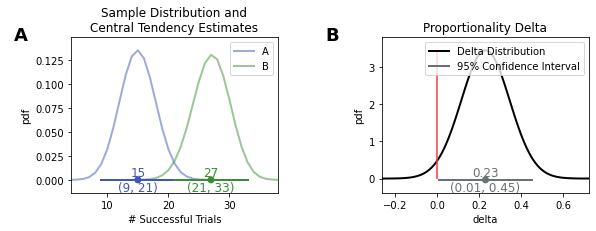

In [6]:
# Visualize the results
layout = ab_test_results.visualize()
layout

The resulting frequentist test results (displayed and visualized above) indicate that hypothesis `"B != A"` should be accepted. A breakdown of the results plot is as follows:

#### Left Plot: Sample Distributions & Central Tendency Estimates
The left plot compares the _parameteric description of the samples_, with parameters that are estimated from the experiment observations. In this case, the parameteric distribution used is the [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution), giving the distribution over the number successful trials for each group when we run as many trials as observed in the dataset.

The left plot also includes estimates of the _central tendency estimates_ of the two sample groups. Central tendencies, along with their confidence intervals are plotted as as line intervals under each distribution. In this example the, central tendency is the expected number of successful trial given the observations, along with the 95% confidence intervals (CIs) around that expected number of successful trials. Note that here 95% CI is derived from the test's `alpha=0.05` (i.e. `confidence = 1-alpha`).

We see that there is large amount of separation between the two distributions. Furthermore, we can see that there is little-to-no overlap of the CIs, further indicating that the two groups are likely different, and, more specifically, that `"B"` is `"larger"` than `"A"` in terms of the observed metric values.

#### Right Plot: Deltas
The right plot shows the distribution of the estimated _difference in central tendencies_ in the black curve. One can think of this curve as the difference of the two curves in the left plot. Included in the deslta distribution are the mean and 95% CIs around the mean of delta distribution.

We can see that the confidence interval on the difference between the two groups does not intersect with the `ProportionsDelta=0` line indicated in red. This is another clue that supporting that three is a statistically significant difference between the two samples.

All the visual evidence supports the result of accepting the `hypothesis` that `B != A`

## Bootstrap Hypothesis Tests

If your samples do not follow standard parametric distributions (e.g. Gaussian, Binomial, Poisson), or if you're comparing more exotic or custom statistics (e.g. variance, skew, etc) then you might want to consider using a non-parametric [Bootstrap Hypothesis Test](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)).  Running bootstrap tests is easy in `spearmint`, you simply use the `"bootstrap"` `inference_method`. By default, `spearmint` bootstraps the mean of the metric distribution, but the scientist can use any `statistic_function` they like, as demonstrated below.

In [7]:
def my_test_statistic(samples):
    """Boootstrap tests support custom test statistics. Here
    we simply re-define the mean in order to compare with parametric
    tests above.

    That saide, we could test the difference in something more exotic,
    like the variance, or something custom
    
    return np.var(samples)
    """
    return np.mean(samples)

bootstrap_ab_test = ab_test.copy(
    inference_method='bootstrap',
    inference_procedure_params=dict(statistic_function=my_test_statistic)
)

---

> 💡
> Above we use the `.copy()` method to copy over all parameters from the original `ab_test`, but update the `inference_method` and `inference_procedure_params`. We could have also defined the `HypothesisTest` from scratch
> ```python
> bootstrap_ab_test = HypothesisTest(
    metric="metric",
    treatment="treatment",
    control="A", variation="B",
    hypothesis="unequal",
    variable_type="binary",
    inference_method="bootstrap",
    statistic_function=my_test_statistic
)
> ```

---

Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ B      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 35     │ 41     │
│           Mean │ 0.4286 │ 0.6585 │
│ Standard Error │ 0.0836 │ 0.0741 │
│       Variance │ 0.2449 │ 0.2249 │
│          Delta │        │ 0.23   │
└────────────────┴────────┴────────┘

Bootstrap Delta Results                                               
┌──────────────────────────────────────────────┬─────────────────────┐
│ Delta                                        │ 0.2279              │
│ Delta CI                                     │ (0.0381, 0.4174)    │
│ Delta-relative                               │ 0.5318 %            │
│ Delta-relative CI                            │ (8.8943, 97.3984) % │
│ Delta CI %-tiles                             │ (0.025, 0.975)      │
│ Effect Size                                  │ 0.4711              │
│ alpha                                        │ 0.05                │
│ Power                                        │ 0.633               │
│ Variable Type                                │ binary              │
│ Inference Method                             │ bootstrap           │
│ Test statistic (bootstrap_my_test_statistic) │ 0.23                │
│ p-value                                      │ 0.019               │
│ Hypothesis                                   │ B != A              │
│ Accept Hypothesis                            │ True                │
└──────────────────────────────────────────────┴─────────────────────┘

:Layout
   .Overlay.Bootstrap_My_Test_Statistic_Comparison :Overlay
      .Curve.A  :Curve   [value]   (pdf)
      .Curve.B  :Curve   [value]   (pdf)
      .Curve.I  :Curve   [x]   (y)
      .Points.A :Points   [x,y]
      .Text.A   :Text   [x,y]
      .Curve.II :Curve   [x]   (y)
      .Points.B :Points   [x,y]
      .Text.B   :Text   [x,y]
   .Overlay.Bootstrap_My_Test_Statistic_Delta      :Overlay
      .Curve.Delta_Distribution                :Curve   [value]   (pdf)
      .Curve.A_95_percent_Confidence_Interval  :Curve   [x]   (y)
      .Points.A_95_percent_Confidence_Interval :Points   [x,y]
      .Text.A_95_percent_Confidence_Interval   :Text   [x,y]
      .Spikes.Null_Delta                       :Spikes   [x]   (pdf)
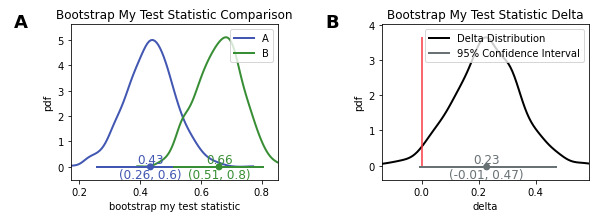

In [8]:
# Run the bootsrap AB test
bootstrap_ab_test_results = experiment.run_test(bootstrap_ab_test)
bootstrap_ab_test_results.display()
bootstrap_ab_test_results.visualize()

The `"bootstrap"` `inference_method` uses non-parametric methods--namely resampling with replacement--to estimate the distribution of the mean of the group sample (this is because the `my_test_statistic` simply returns the `mean`). Compared to the visualization for the `"frequentist"` `inference_method` for `"binary"` variables, the left plot for the `"bootstrap"` `inference_method` shows the distribution _conversion rates_, rather than the number of successful trials rather than Binomial distribution defined by parameters estimated from the data.

The `"bootstrap"` hypothesis test results are very similar to the results returned by the `"frequentist"` `inference_method`. The results from the different `inference_methods` should converge as the sample size of each group grows.

## Bayesian Hypothesis Tests
In addition to Frequentist and Bootstrap tests, `spearmint` supports Bayesian hypothesis tests. To run a Bayesian test, simply intitialize the `HypothesisTest` (or `.copy` one) with a `inference_method="bayesian"`.

In [9]:
# Here we again use the `.copy method`
bayesian_ab_test = ab_test.copy(inference_method='bayesian')

# Run the Bayesian test
bayesian_ab_test_results = experiment.run_test(bayesian_ab_test)
assert bayesian_ab_test_results.accept_hypothesis
assert bayesian_ab_test_results.prob_greater_than_zero > .95

##### Displaying Bayesian Results

In [10]:
bayesian_ab_test_results.display()

Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ B      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 35     │ 41     │
│           Mean │ 0.4286 │ 0.6585 │
│ Standard Error │ 0.0836 │ 0.0741 │
│       Variance │ 0.2449 │ 0.2249 │
│          Delta │        │ 0.23   │
└────────────────┴────────┴────────┘

Bayesian Delta Results                   
┌────────────────────┬──────────────────┐
│ Delta              │ 0.2172           │
│ Delta HDI          │ (0.0127, 0.4211) │
│ Delta Relative     │ 50.58 %          │
│ Delta-relative HDI │ (2.95, 98.05) %  │
│ Effect Size        │ 2.0219           │
│ Effect Size HDI    │ (0.1181, 3.9196) │
│ HDI %-tiles        │ (0.025, 0.975)   │
│ Credible Mass      │ 0.95             │
│ Variable Type      │ binary           │
│ Inference Method   │ Bayesian         │
│ Model Name         │ binomial         │
│ Estimation Method  │ analytic         │
│ p(B > A)           │ 0.975            │
│ Hypothesis         │ B != A           │
│ Accept Hypothesis  │ True             │
└────────────────────┴──────────────────┘

In the Bayesian results, we see that p(B > A) 0.974. This states that there is a 97.4% probability that conversion rate for group `"B"` is greater than group `"A"`. Given this evidence we can infer that `B != A`, and can accept the `hypothesis="unequal"`.

---

> ❓ Bayesian vs Frequentist Tests
>
> In Frequentist tests, we calculate some test statistic that is a function of the observed data (e.g. z-statistic, t-statistic), then use the p-value associated with the value of that calcualted test statistic in order to make a statement about statistical significance.
>
> In Bayesian tests we instead build a generative model that we believe could have generated the observed data, and estimate the parameters of that model such that it's as accurate as possible at capturing the distribution of observed data. The generative model's parameters all have their own probability distributions, and we compare the distributions of those parameters in order to make statistical statements about the data.
>
---

##### Visualizing Bayesian Results

:Layout
   .Overlay.Posterior_p_Comparison :Overlay
      .Curve.A  :Curve   [value]   (pdf)
      .Curve.B  :Curve   [value]   (pdf)
      .Curve.I  :Curve   [x]   (y)
      .Points.A :Points   [x,y]
      .Text.A   :Text   [x,y]
      .Curve.II :Curve   [x]   (y)
      .Points.B :Points   [x,y]
      .Text.B   :Text   [x,y]
   .Overlay.Posterior_p_Delta      :Overlay
      .Curve.Delta_Distribution            :Curve   [value]   (pdf)
      .Curve.A_0_full_stop_95_percent_HDI  :Curve   [x]   (y)
      .Points.A_0_full_stop_95_percent_HDI :Points   [x,y]
      .Text.A_0_full_stop_95_percent_HDI   :Text   [x,y]
      .Spikes.Null_Delta                   :Spikes   [x]   (pdf)
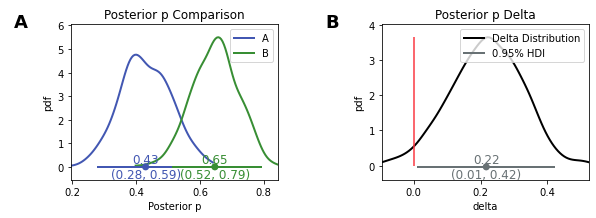

In [11]:
bayesian_ab_test_results.visualize()

Bayesian visualizations have a similar layout to Frequentist and Bootstrap tests. Namely we have a left plot with shows estimates of the central tendencies amongts the groups, along with error intervals around those distributions. Note that here these are not statistics (e.g. mean) of the data per se, but expected value parameters of a generative model that tries to describe the data. The difference is subtle, but using a generative model under the hoood allows the research to incorporate prior knowledge into the analysis, which can be usefule in scenarios with few observations.

Similar to the Frequentist/Bootstrap visualization, we also include a Delta distribution. This plot carries similar semantics to the Delta plot for Frequentist/Bootstrap tests.

We can also see that rather than using Confidence Intervals (CIs), Bayesian results use Highest Density Intervals (HDIs). CIs and HDIs are not equivalent, but the differences between CIs and HDIs are subtle. But from a bird's-ey-view, CIs and HDIs differ in that CIs make parametric assumptions about the shape of the errors of our estimates, while HDIs estimate error distributions directly from the probability distributions that define the underlying Bayesian model. In terms of pragmatic interpretation of the results, you can use CIs and HDIs in a similar fashion, as indicated by similiar results reported by Frequentist/Bootstrap CIs and Bayesian HDIs.

### Bayesian Model Specification
Bayesian models allow the experimenter to incorporate prior beliefs. This can be helpful when you have little data, or can provide sound domain knowledge of baselines. Specifying custom priors is also straight-forward using `spearmint`. Simply pass in a `model_params` argument during `HypothesisTest` initialization. Below we demonstrate by running another Bayesian hypothesis test, this time with a hierarchical [Beta-Binomial model](https://en.wikipedia.org/wiki/Beta-binomial_distribution#:~:text=In%20probability%20theory%20and%20statistics,is%20either%20unknown%20or%20random.). This model allows the user to specify a prior over the base probability $p$ by setting two hyperparameters for the Beta Distribution $\alpha$ and $\beta$ such that the mean prior has a value of 

$$ p = \frac{\alpha}{\alpha + \beta}$$

where the larger $\alpha$ and $\beta$. Let's put a super-strong prior on $p$ and see how it affects the inference results.

Below we print the default prior parameters for the Bayesian Hypothesis test above.

In [12]:
print("Default Bayesian model hyperparams", bayesian_ab_test_results.model_hyperparams)

Default Bayesian model hyperparams {'prior_alpha': 1.0, 'prior_beta': 1.0}


 We see that we use a "Beta" prior with prior parameters (`prior_alpha=1.0` and `prior_beta=1.0`). This is equivalent to a non-informative prior, essentially a uniform prior over all possible conversion rates. You can verify this by adding the `include_prior=True` flag to the `binomial_ab_test_results.visualize()` method:

:Layout
   .Overlay.Posterior_p_Comparison :Overlay
      .Curve.A     :Curve   [value]   (pdf)
      .Curve.B     :Curve   [value]   (pdf)
      .Curve.I     :Curve   [x]   (y)
      .Points.A    :Points   [x,y]
      .Text.A      :Text   [x,y]
      .Curve.II    :Curve   [x]   (y)
      .Points.B    :Points   [x,y]
      .Text.B      :Text   [x,y]
      .Curve.Prior :Curve   [value]   (pdf)
   .Overlay.Posterior_p_Delta      :Overlay
      .Curve.Delta_Distribution            :Curve   [value]   (pdf)
      .Curve.A_0_full_stop_95_percent_HDI  :Curve   [x]   (y)
      .Points.A_0_full_stop_95_percent_HDI :Points   [x,y]
      .Text.A_0_full_stop_95_percent_HDI   :Text   [x,y]
      .Spikes.Null_Delta                   :Spikes   [x]   (pdf)
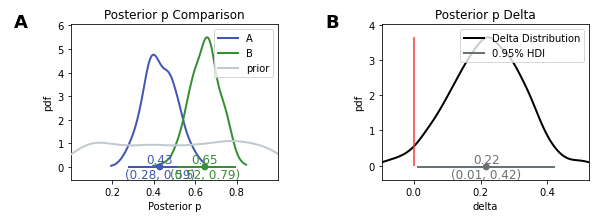

In [13]:
bayesian_ab_test_results.visualize(include_prior=True)

The default prior, plotted in gray is more-or-less uniform across the entire probability space. 

Below we rerun our Bayesian inference, but with a much stronger prior, one that defines a Beta prior tightly bound around 0.5. In this scenario we either need a lot of data to overcome the prior, or _very_ strong effects to pull the data away from that prior

Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ C      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 35     │ 44     │
│           Mean │ 0.4286 │ 0.75   │
│ Standard Error │ 0.0836 │ 0.0653 │
│       Variance │ 0.2449 │ 0.1875 │
│          Delta │        │ 0.3214 │
└────────────────┴────────┴────────┘

Bayesian Delta Results                    
┌────────────────────┬───────────────────┐
│ Delta              │ 0.054             │
│ Delta HDI          │ (-0.0289, 0.1494) │
│ Delta Relative     │ 11.02 %           │
│ Delta-relative HDI │ (-5.89, 30.5) %   │
│ Effect Size        │ 1.2028            │
│ Effect Size HDI    │ (-0.6432, 3.3278) │
│ HDI %-tiles        │ (0.025, 0.975)    │
│ Credible Mass      │ 0.95              │
│ Variable Type      │ binary            │
│ Inference Method   │ Bayesian          │
│ Model Name         │ binomial          │
│ Estimation Method  │ analytic          │
│ p(C > A)           │ 0.886             │
│ Hypothesis         │ C is larger       │
│ Accept Hypothesis  │ False             │
└────────────────────┴───────────────────┘

:Layout
   .Overlay.Posterior_p_Comparison :Overlay
      .Curve.A     :Curve   [value]   (pdf)
      .Curve.C     :Curve   [value]   (pdf)
      .Curve.I     :Curve   [x]   (y)
      .Points.A    :Points   [x,y]
      .Text.A      :Text   [x,y]
      .Curve.II    :Curve   [x]   (y)
      .Points.C    :Points   [x,y]
      .Text.C      :Text   [x,y]
      .Curve.Prior :Curve   [value]   (pdf)
   .Overlay.Posterior_p_Delta      :Overlay
      .Curve.Delta_Distribution            :Curve   [value]   (pdf)
      .Curve.A_0_full_stop_95_percent_HDI  :Curve   [x]   (y)
      .Points.A_0_full_stop_95_percent_HDI :Points   [x,y]
      .Text.A_0_full_stop_95_percent_HDI   :Text   [x,y]
      .Spikes.Null_Delta                   :Spikes   [x]   (pdf)
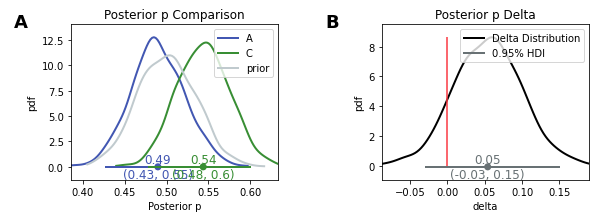

In [14]:
# Run Bayesian test with custom prior

# strong prior that p = alpha / (alpha + beta) = 0.5
strong_prior_model_params = dict(prior_alpha=100, prior_beta=100)

custom_bayesian_ab_test = HypothesisTest(
    metric='metric',
    control='A', variation='C',
    inference_method='bayesian',
    bayesian_model_params=strong_prior_model_params
)

# run the test with strong prior
custom_bayesian_ab_test_results = experiment.run_test(custom_bayesian_ab_test)
assert not custom_bayesian_ab_test_results.prob_greater_than_zero > .95  # strong prior dominates data
custom_bayesian_ab_test_results.display()
custom_bayesian_ab_test_results.visualize(include_prior=True)  # `include_prior`

Here we see that the strong prior of $p=0.5$ influences the proportion parameters to values around 0.5. This causes our delta distribution (right plot) to be much smaller because the two groups' mdoels that are forced to be near a prior mean (here 0.5), and thus will be located closer to one another than if we had used a weaker prior.

If there were more data in the experiment, these parameter estimates would move toward the data distribution, rather than the super-confident prior distribution, providing results that are similar to the results provided by the Frequentist and weak-prior Bayesian models.

## Including Segmentations
`spearmint` supports the ability to segment experiment observations based on one or more attributes in your dataset using the `segmentation` argument to `HyptothesisTest`. The segmentation can be a string or list of string expressions, each of which follow the [pandas query API](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html)

Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ C      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 19     │ 21     │
│           Mean │ 0.4737 │ 0.7143 │
│ Standard Error │ 0.1145 │ 0.0986 │
│       Variance │ 0.2493 │ 0.2041 │
│          Delta │        │ 0.2406 │
└────────────────┴────────┴────────┘

Bayesian Delta Results                    
┌────────────────────┬───────────────────┐
│ Delta              │ 0.2238            │
│ Delta HDI          │ (-0.0504, 0.4684) │
│ Delta Relative     │ 47.37 %           │
│ Delta-relative HDI │ (-10.67, 99.16) % │
│ Effect Size        │ 1.622             │
│ Effect Size HDI    │ (-0.3652, 3.3952) │
│ HDI %-tiles        │ (0.025, 0.975)    │
│ Credible Mass      │ 0.95              │
│ Variable Type      │ binary            │
│ Inference Method   │ Bayesian          │
│ Model Name         │ binomial          │
│ Estimation Method  │ analytic          │
│ p(C > A)           │ 0.95              │
│ Hypothesis         │ C is larger       │
│ Accept Hypothesis  │ True              │
└────────────────────┴───────────────────┘

:Layout
   .Overlay.Posterior_p_Comparison :Overlay
      .Curve.A  :Curve   [value]   (pdf)
      .Curve.C  :Curve   [value]   (pdf)
      .Curve.I  :Curve   [x]   (y)
      .Points.A :Points   [x,y]
      .Text.A   :Text   [x,y]
      .Curve.II :Curve   [x]   (y)
      .Points.C :Points   [x,y]
      .Text.C   :Text   [x,y]
   .Overlay.Posterior_p_Delta      :Overlay
      .Curve.Delta_Distribution            :Curve   [value]   (pdf)
      .Curve.A_0_full_stop_95_percent_HDI  :Curve   [x]   (y)
      .Points.A_0_full_stop_95_percent_HDI :Points   [x,y]
      .Text.A_0_full_stop_95_percent_HDI   :Text   [x,y]
      .Spikes.Null_Delta                   :Spikes   [x]   (pdf)
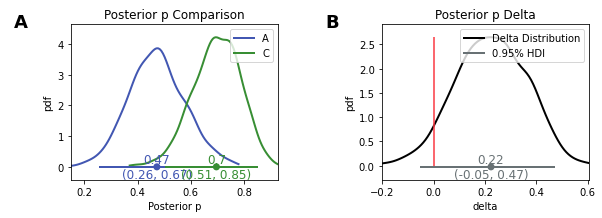

In [15]:
# Initialize an A/B test with additional segmentation on the 'attr_1' attribute
ab_test_segmented = HypothesisTest(
    metric='metric',
    control='A', variation='C',
    inference_method='bayesian',
    hypothesis='larger',
    segmentation="attr_1 == 'A1a'"
)

# Run the segmented test
ab_test_segmented_results = experiment.run_test(ab_test_segmented)

# Display results (notice reduced sample sizes)
ab_test_segmented_results.display()
ab_test_segmented_results.visualize()

We now see that if we dig into a particular segment, namely the segement defined by `"attr_1 == 'A1a'"`, we can no longer accept the hypothesis that `"C is larger"`. Since we are using a Bayesian test (recommended for doing segmentations because Bayesian tests aren't affected by Multiple comparisons errors -- See **Running multiple Freqeuntist tests, and Multiple Comparison control** below.) evidence for rejecting the hypothesis comes from the fact the p(C > A) = 0.936, which is less than the `Credible Mass` of 0.95 required by our experiment (as defined by `alpha`). Other evidence comes from the fact that HDIs of the the Delta distribution (right plot) overlap with the zero-value associated with no difference.

## Running multiple Frequentist tests, and Multiple Comparison control
When running multiple Frequentist hypothesis tests on the same metric, you'll need to control for [multiple comparisons](https://en.wikipedia.org/wiki/Multiple_comparisons_problem). This is handled by running a `HypothesisTestGroup` against the experiment. The  `HypothesisTestGroup` is a list of hypothesis tests. When the `Experiment.run_test_group` method is applied to the `HypothesisTestGroup`  the value of each test's `alpha` is adjusted so that is more conservative in order to avoid inflated Type I error rates caused by Multiple Comparison artifacts.

### Example
In the example below we run 3 independent tests comparing A to A, B to A and C to A, and set the correction `method` to `'bonferroni'`, which simply updates the effective $\alpha_{corrected} = \frac{\alpha}{N_{tests}}$. Our original value for `alpha=0.05`, thus the corrected value would be $\frac{0.05}{3} = 0.0167$

In [16]:
from spearmint.hypothesis_test import HypothesisTestGroup

# Use the `HypothesisTest.copy` method for duplicating test
# configurations, while overwriting specific parameters, in
# this case `variation` parameter
aa_test = ab_test.copy(variation='A')
ac_test = ab_test.copy(variation='C')

# Initialize the `HypothesisTestGroup`
test_group = HypothesisTestGroup(
    tests=[aa_test, ab_test, ac_test],
    correction_method='bonferroni'
)

# Run tests
test_suite_results = experiment.run_test_group(test_group)

# Print results
test_suite_results.display()

------------------------------------------------------------
Test 1 of 3


Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ A      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 35     │ 35     │
│           Mean │ 0.4286 │ 0.4286 │
│ Standard Error │ 0.0836 │ 0.0836 │
│       Variance │ 0.2449 │ 0.2449 │
│          Delta │        │ 0.0    │
└────────────────┴────────┴────────┘

Proportions Delta Results                     
┌────────────────────┬───────────────────────┐
│ Delta              │ 0.0                   │
│ Delta CI           │ (-0.2873, 0.2873)     │
│ Delta-relative     │ 0.0 %                 │
│ Delta-relative CI  │ (-67.0448, 67.0448) % │
│ Delta CI %-tiles   │ (0.0083, 0.9917)      │
│ Effect Size        │ 0.0                   │
│ alpha (corrected)  │ 0.017                 │
│ Power              │ 0.017                 │
│ Variable Type      │ binary                │
│ Inference Method   │ frequentist           │
│ Test statistic (z) │ 0.0                   │
│ p-value            │ 1.0                   │
│ Hypothesis         │ A != A                │
│ Accept Hypothesis  │ False                 │
│ MC Correction      │ bonferroni_correction │
└────────────────────┴───────────────────────┘

------------------------------------------------------------
Test 2 of 3


Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ B      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 35     │ 41     │
│           Mean │ 0.4286 │ 0.6585 │
│ Standard Error │ 0.0836 │ 0.0741 │
│       Variance │ 0.2449 │ 0.2249 │
│          Delta │        │ 0.23   │
└────────────────┴────────┴────────┘

Proportions Delta Results                     
┌────────────────────┬───────────────────────┐
│ Delta              │ 0.23                  │
│ Delta CI           │ (-0.0402, 0.5001)     │
│ Delta-relative     │ 0.5366 %              │
│ Delta-relative CI  │ (-9.3736, 116.6906) % │
│ Delta CI %-tiles   │ (0.0083, 0.9917)      │
│ Effect Size        │ 0.4753                │
│ alpha (corrected)  │ 0.017                 │
│ Power              │ 0.371                 │
│ Variable Type      │ binary                │
│ Inference Method   │ frequentist           │
│ Test statistic (z) │ 2.36                  │
│ p-value            │ 0.0183                │
│ Hypothesis         │ B != A                │
│ Accept Hypothesis  │ False                 │
│ MC Correction      │ bonferroni_correction │
└────────────────────┴───────────────────────┘

------------------------------------------------------------
Test 3 of 3


Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ C      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 35     │ 44     │
│           Mean │ 0.4286 │ 0.75   │
│ Standard Error │ 0.0836 │ 0.0653 │
│       Variance │ 0.2449 │ 0.1875 │
│          Delta │        │ 0.3214 │
└────────────────┴────────┴────────┘

Proportions Delta Results                     
┌────────────────────┬───────────────────────┐
│ Delta              │ 0.3214                │
│ Delta CI           │ (0.068, 0.5749)       │
│ Delta-relative     │ 0.75 %                │
│ Delta-relative CI  │ (15.8661, 134.1339) % │
│ Delta CI %-tiles   │ (0.0083, 0.9917)      │
│ Effect Size        │ 0.6967                │
│ alpha (corrected)  │ 0.017                 │
│ Power              │ 0.752                 │
│ Variable Type      │ binary                │
│ Inference Method   │ frequentist           │
│ Test statistic (z) │ 3.47                  │
│ p-value            │ 0.0005                │
│ Hypothesis         │ C != A                │
│ Accept Hypothesis  │ True                  │
│ MC Correction      │ bonferroni_correction │
└────────────────────┴───────────────────────┘

Note that the alpha has been `(corrected)` to a value of 0.017, using `MC Correction='bonferroni_correction'`

The `HypothesisTestSuite` supports the following multiple comparison strategies:
- ['sidak'](http://en.wikipedia.org/wiki/%C5%A0id%C3%A1k_correction) (default)
- ['bonferonni'](http://en.wikipedia.org/wiki/Bonferroni_correction)
- [Benjamini-Hochberg false-discovery rate ('bh_fdr')](http://pdfs.semanticscholar.org/af6e/9cd1652b40e219b45402313ec6f4b5b3d96b.pdf)

## Custom Metrics
`spearmint` also supports the use of custom metrics, which can transform and combine information from one or more columns.

### Example
In the example below we create a `CustomMetric` always makes the `variation` greater than the `control` by adding a constant offset (plus noise) to the value of the the `control`.

In [17]:
from spearmint import CustomMetric

def custom_metric(row):
    """
    Define a custom 'metric' where the control is larger
    than the variation most of the time. This metric should
    result in a an observed delta of ~-4.0.
    """
    return 4 + np.random.rand() if row['treatment'] == 'A' else np.random.rand()

custom_test = HypothesisTest(
    metric=CustomMetric(custom_metric),
    control='A',
    variation='B',
    inference_method='frequentist',  # Note we use a t-test here.
    hypothesis='larger'
)

custom_test = experiment.run_test(custom_test)
custom_test.display()

Samples Comparison                   
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃                ┃ A      ┃ B       ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│        Samples │ 35     │ 41      │
│           Mean │ 4.4109 │ 0.5162  │
│ Standard Error │ 0.0464 │ 0.0441  │
│       Variance │ 0.0755 │ 0.0798  │
│          Delta │        │ -3.8947 │
└────────────────┴────────┴─────────┘

Means Delta Results                       
┌────────────────────┬───────────────────┐
│ Delta              │ -3.8947           │
│ Delta CI           │ (-4.0014, inf)    │
│ Delta-relative     │ -0.883 %          │
│ Delta-relative CI  │ (-90.7167, inf) % │
│ Delta CI %-tiles   │ (0.05, inf)       │
│ Effect Size        │ -13.9646          │
│ alpha              │ 0.05              │
│ Power              │ 0.0               │
│ Variable Type      │ continuous        │
│ Inference Method   │ frequentist       │
│ Test statistic (z) │ -59.88            │
│ p-value            │ 1.0               │
│ Hypothesis         │ B is larger       │
│ Accept Hypothesis  │ False             │
└────────────────────┴───────────────────┘

We see that, as expected, we have highly significant results, accepting the hypothesis that `'B != A'`

## Working with other types of variables
The examples above demonstrate running AB tests for variables that take on binary values--i.e. variables that take on values that exist in the interval $[0, 1]$. This is a pretty common scenario, as a lot of AB tests measure metrics like conversions at various stages in a UX funnel.

However, `spearmint` also supports inference methods for other types of variables, like `"continuous"` variables (e.g. time spent on a page) and `"counts"` (e.g. number of clicks on a button per unit time).

### Continuous Variables
When testing the difference in means between samples of continuous variables we often those difference using Gaussian-distributed random variables. The most common statistical inference procedure for this scenario is the [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) (referred to as `"means_delta"` under the hood, as it tests for differences in means of the underlying Gaussian distributions from each of treatments).

Below we generate some Gaussian-distributed observations and show how ✨spearmint✨can be used to run a t-test using the common `Experiment->HypothesisTest->InferenceResults` workflow.

In [18]:
# generate some fake Gaussian-distributed trial data
continuous_data = generate_fake_observations(
    distribution='gaussian',  # binary data
    n_treatments=3,
    n_attributes=2,
    n_observations=100
)
continuous_data.head()

,id,treatment,metric,attr_0,attr_1
0,0,C,2.093461,A0a,A1c
1,1,B,0.760331,A0a,A1b
2,2,C,3.459589,A0a,A1b
3,3,C,3.395353,A0a,A1c
4,4,A,1.959411,A0a,A1c


Here we use the `variable_type="continuous"` argument to run the t-test

Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ B      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 30     │ 32     │
│           Mean │ 0.2254 │ 0.9297 │
│ Standard Error │ 0.1713 │ 0.1369 │
│       Variance │ 0.8801 │ 0.5997 │
│          Delta │        │ 0.7043 │
└────────────────┴────────┴────────┘

Means Delta Results                            
┌────────────────────┬────────────────────────┐
│ Delta              │ 0.7043                 │
│ Delta CI           │ (0.2578, 1.1508)       │
│ Delta-relative     │ 3.1243 %               │
│ Delta-relative CI  │ (114.3585, 510.5057) % │
│ Delta CI %-tiles   │ (0.025, 0.975)         │
│ Effect Size        │ 0.8214                 │
│ alpha              │ 0.05                   │
│ Power              │ 0.889                  │
│ Variable Type      │ continuous             │
│ Inference Method   │ frequentist            │
│ Test statistic (t) │ 3.18                   │
│ p-value            │ 0.0023                 │
│ Degrees of Freedom │ 60                     │
│ Hypothesis         │ B != A                 │
│ Accept Hypothesis  │ True                   │
└────────────────────┴────────────────────────┘

:Layout
   .Overlay.Sample_Distribution_and_Central_Tendency_Estimates :Overlay
      .Curve.A  :Curve   [value]   (pdf)
      .Curve.B  :Curve   [value]   (pdf)
      .Curve.I  :Curve   [x]   (y)
      .Points.A :Points   [x,y]
      .Text.A   :Text   [x,y]
      .Curve.II :Curve   [x]   (y)
      .Points.B :Points   [x,y]
      .Text.B   :Text   [x,y]
   .Overlay.Means_Delta                                        :Overlay
      .Curve.Delta_Distribution                :Curve   [value]   (pdf)
      .Curve.A_95_percent_Confidence_Interval  :Curve   [x]   (y)
      .Points.A_95_percent_Confidence_Interval :Points   [x,y]
      .Text.A_95_percent_Confidence_Interval   :Text   [x,y]
      .Spikes.Null_Delta                       :Spikes   [x]   (pdf)
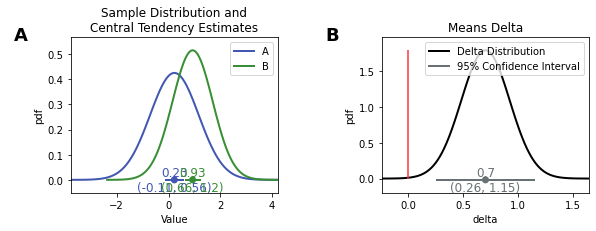

In [19]:
# Initialize the Experiment
continuous_experiment = Experiment(data=continuous_data)

# Initialize the A/B test
continuous_ab_test = HypothesisTest(
    metric="metric",
    treatment="treatment",
    control="A", variation="B",
    hypothesis="unequal",
    variable_type="continuous"
)

# Run the test with an alpha of 0.05
continuous_ab_test_results = continuous_experiment.run_test(continuous_ab_test, alpha=.05)

# Check the test results decision
assert continuous_ab_test_results.accept_hypothesis
continuous_ab_test_results.display()
continuous_ab_test_results.visualize()

#### Bayesian models for continuous variables
The Bayesian analog to the t-test is called the "Hierarchical Gaussian" and involves modeling the observations as a generative process where each point is sampled from a Gaussian distribution with mean $\mu$ and variance $\sigma^2$. The model is "hierarchical" because it also assumes there is a distribution over both $\mu$ and $\sigma^2$ as well, namely $\mu \sim \text{Normal}(\bar{x}, \text{std(x)})$ and $\sigma \sim \text{Uniform}(0, \sigma_{max})$, where $\bar{x}$ and  $\text{std(x)}$ are the empirical mean and standard deviation of the observations, and $\sigma_{max}$ is a user-specified hyperparameter.


That all sounds pretty complicated, right? Well, in ✨spearmint✨ it's easy to run inference using this model. We simply update the `inference_method`:

Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ B      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 30     │ 32     │
│           Mean │ 0.2254 │ 0.9297 │
│ Standard Error │ 0.1713 │ 0.1369 │
│       Variance │ 0.8801 │ 0.5997 │
│          Delta │        │ 0.7043 │
└────────────────┴────────┴────────┘

Bayesian Delta Results                     
┌────────────────────┬────────────────────┐
│ Delta              │ 0.7007             │
│ Delta HDI          │ (0.2724, 1.123)    │
│ Delta Relative     │ 307.55 %           │
│ Delta-relative HDI │ (119.56, 492.88) % │
│ Effect Size        │ 3.3019             │
│ Effect Size HDI    │ (1.2836, 5.2916)   │
│ HDI %-tiles        │ (0.025, 0.975)     │
│ Credible Mass      │ 0.95               │
│ Variable Type      │ continuous         │
│ Inference Method   │ Bayesian           │
│ Model Name         │ gaussian           │
│ Estimation Method  │ analytic           │
│ p(B > A)           │ 1.0                │
│ Hypothesis         │ B != A             │
│ Accept Hypothesis  │ True               │
└────────────────────┴────────────────────┘

:Layout
   .Overlay.Posterior_mu_Comparison :Overlay
      .Curve.A  :Curve   [value]   (pdf)
      .Curve.B  :Curve   [value]   (pdf)
      .Curve.I  :Curve   [x]   (y)
      .Points.A :Points   [x,y]
      .Text.A   :Text   [x,y]
      .Curve.II :Curve   [x]   (y)
      .Points.B :Points   [x,y]
      .Text.B   :Text   [x,y]
   .Overlay.Posterior_mu_Delta      :Overlay
      .Curve.Delta_Distribution            :Curve   [value]   (pdf)
      .Curve.A_0_full_stop_95_percent_HDI  :Curve   [x]   (y)
      .Points.A_0_full_stop_95_percent_HDI :Points   [x,y]
      .Text.A_0_full_stop_95_percent_HDI   :Text   [x,y]
      .Spikes.Null_Delta                   :Spikes   [x]   (pdf)
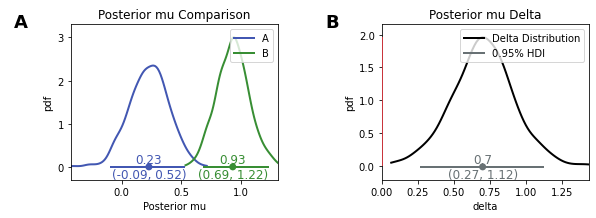

In [20]:
# copying parameters from original AB test -- note we must update the `variable_type`, as we're using 
bayesian_continuous_ab_test = ab_test.copy(inference_method='bayesian', variable_type='continuous')

# Run the test with an alpha of 0.5; get back a InferenceResults object
bayesian_continuous_ab_test_results = continuous_experiment.run_test(bayesian_continuous_ab_test, alpha=.05)

# Check the test results decision
assert bayesian_continuous_ab_test_results.accept_hypothesis
bayesian_continuous_ab_test_results.display()
bayesian_continuous_ab_test_results.visualize()

### Counts / Rates variables
✨spearmint✨ also supports analysis of counts variables such as clicks or page views per standard unit of time. These discrete, countable variables often modeled as a Poisson distribution. In the Frequentist setting, rather than testing if the _difference_ between the two groups' expected values is greater than zero, we instead model whether the _ratio_ of their expected values different from one. The reasoning being that if the two treatments have equal expected number of events per the same unit of time (and thus the same _rate_) then their ratio will be close to one (Accordingly, in ✨spearmint✨, this underlying comparison model is called a "Rates Ratio").

Below we'll run an AB test on syntetic data drawn from a Poisson distribution, and test to see if the two distributions are statistically different.

In [21]:
# generate some fake Gaussian-distributed trial data
counts_data = generate_fake_observations(
    distribution='poisson',  # binary data
    n_treatments=3,
    n_observations=1000
)
counts_data.head()

,id,treatment,metric,attr_0,attr_1
0,0,C,8,A0a,A1a
1,1,B,1,A0a,A1a
2,2,C,1,A0a,A1b
3,3,C,5,A0a,A1a
4,4,A,3,A0a,A1b


Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ B      ┃ C      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 345    │ 337    │
│           Mean │ 1.9768 │ 3.0119 │
│ Standard Error │ 0.0726 │ 0.0968 │
│       Variance │ 1.8198 │ 3.1571 │
│          Delta │        │ 1.0351 │
└────────────────┴────────┴────────┘

Rates Ratio Results                          
┌────────────────────┬──────────────────────┐
│ Delta              │ 1.5236               │
│ Delta CI           │ (1.3826, 1.6787)     │
│ Delta-relative     │ 1.5236 %             │
│ Delta-relative CI  │ (69.9431, 84.9217) % │
│ Delta CI %-tiles   │ (0.025, 0.975)       │
│ Effect Size        │ 0.3121               │
│ alpha              │ 0.05                 │
│ Power              │ 1.0                  │
│ Variable Type      │ counts               │
│ Inference Method   │ frequentist          │
│ Test statistic (W) │ 8.6                  │
│ p-value            │ 0.0                  │
│ Hypothesis         │ C != B               │
│ Accept Hypothesis  │ True                 │
└────────────────────┴──────────────────────┘

:Layout
   .Overlay.Sample_Distribution_and_Central_Tendency_Estimates :Overlay
      .Curve.B  :Curve   [value]   (pdf)
      .Curve.C  :Curve   [value]   (pdf)
      .Curve.I  :Curve   [x]   (y)
      .Points.B :Points   [x,y]
      .Text.B   :Text   [x,y]
      .Curve.II :Curve   [x]   (y)
      .Points.C :Points   [x,y]
      .Text.C   :Text   [x,y]
   .Overlay.Rates_Ratio                                        :Overlay
      .Curve.Delta_Distribution                :Curve   [value]   (pdf)
      .Curve.A_95_percent_Confidence_Interval  :Curve   [x]   (y)
      .Points.A_95_percent_Confidence_Interval :Points   [x,y]
      .Text.A_95_percent_Confidence_Interval   :Text   [x,y]
      .Spikes.Null_Ratio                       :Spikes   [x]   (pdf)
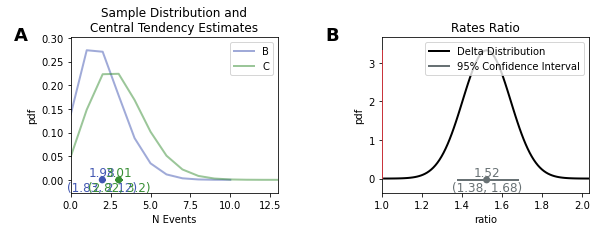

In [22]:
# Initialize the A/B test
counts_experiment = Experiment(data=counts_data)

counts_ab_test = HypothesisTest(
    metric="metric",
    treatment="treatment",
    control="B", variation="C",
    hypothesis="unequal",
    # variable_type='counts'  # Note: spearmint will infer variable type from data
)

# Run the test with an alpha of 0.5; get back a InferenceResults object
poisson_ab_test_results = counts_experiment.run_test(counts_ab_test, alpha=.05)

# Check the test results decision
poisson_ab_test_results.display()
poisson_ab_test_results.visualize()

Here we can see that the ratio of the two rate parameters ranges between 1.38 and 1.68 (95% confidence), with no overlap with the value 1. This indicates that the variation `"C"`s location parameter is approximately 1.5x that of the control `"B"`, which makes sense, given the mean estimates for the two treatments are approximately 3 and 2, respectively.

#### Bayesian models for count variables
The Bayesian analog to the rates ratio test is what's called the [Gamma-Poisson model](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Gammapoisson.pdf). In this model the observations are assumed to be generated from a Poisson distribution with location parameter $\lambda$. Similar to the "Hierarchical Gaussian" Bayesian, there is a prior distribution associated with $\lambda$ (that's what makes it Bayesian!). Namely $\lambda \sim \text{Gamma}(\alpha, \beta)$. Here the hyperparameters $\alpha$ and $\beta$ can be set by the experimenter (as `bayesian_model_params=dict(prior_alpha=..., prior_beta=...)`  to encode any intuitions or domain knowledge about the problem.

Though this sounds complicated, implementing a hypothesis test using an inference method based off of the Gamma-Poisson model is not:

Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ B      ┃ C      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 345    │ 337    │
│           Mean │ 1.9768 │ 3.0119 │
│ Standard Error │ 0.0726 │ 0.0968 │
│       Variance │ 1.8198 │ 3.1571 │
│          Delta │        │ 1.0351 │
└────────────────┴────────┴────────┘

Bayesian Delta Results                   
┌────────────────────┬──────────────────┐
│ Delta              │ 1.031            │
│ Delta HDI          │ (0.7842, 1.2747) │
│ Delta Relative     │ 52.18 %          │
│ Delta-relative HDI │ (39.69, 64.51) % │
│ Effect Size        │ 8.3781           │
│ Effect Size HDI    │ (6.3722, 10.358) │
│ HDI %-tiles        │ (0.025, 0.975)   │
│ Credible Mass      │ 0.95             │
│ Variable Type      │ counts           │
│ Inference Method   │ Bayesian         │
│ Model Name         │ poisson          │
│ Estimation Method  │ analytic         │
│ p(C > B)           │ 1.0              │
│ Hypothesis         │ C != B           │
│ Accept Hypothesis  │ True             │
└────────────────────┴──────────────────┘

:Layout
   .Overlay.Posterior_lambda_Comparison :Overlay
      .Curve.B  :Curve   [value]   (pdf)
      .Curve.C  :Curve   [value]   (pdf)
      .Curve.I  :Curve   [x]   (y)
      .Points.B :Points   [x,y]
      .Text.B   :Text   [x,y]
      .Curve.II :Curve   [x]   (y)
      .Points.C :Points   [x,y]
      .Text.C   :Text   [x,y]
   .Overlay.Posterior_lambda_Delta      :Overlay
      .Curve.Delta_Distribution            :Curve   [value]   (pdf)
      .Curve.A_0_full_stop_95_percent_HDI  :Curve   [x]   (y)
      .Points.A_0_full_stop_95_percent_HDI :Points   [x,y]
      .Text.A_0_full_stop_95_percent_HDI   :Text   [x,y]
      .Spikes.Null_Delta                   :Spikes   [x]   (pdf)
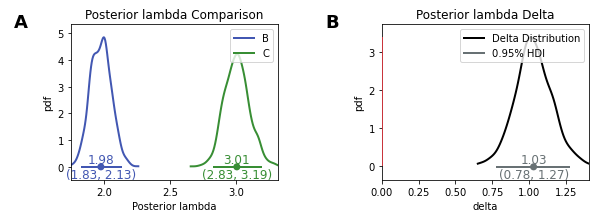

In [23]:
bayesian_counts_ab_test = counts_ab_test.copy(inference_method='bayesian')

bayesian_counts_ab_test_results = counts_experiment.run_test(bayesian_counts_ab_test)

bayesian_counts_ab_test_results.display()
bayesian_counts_ab_test_results.visualize()

Note here that samples drawn from the Bayesian model provide similar central tendency interval estimates to those calculated by the analytical rates ratio model. However, unlike the rates ratio model which looks at the ratio of central tendencies, the Bayesian AB tests provides _deltas_ or differences amongst the _Poisson rate parameter_ samples drawn from the model. Thus differences in $\lambda$ samples that are far away from zero (in this case the diffence is--and should be--approximately equal to one) indicate significant difference between the treatments when interpreting the Bayesian counts AB test.

## Conversion rate variables
If you are testing conversion rate data directly--i.e. floats in the range (0, 1), rather than binary values--you can use either the `"binary"` or `"continuous"` `variable_types`. This is because conversion rates are essentially means, and the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) allows the scientist to model those conversion rates as Gaussian distributions. Additionally all the models for `"binary"` data should support conversion rates as well.

### Example

Below we model conversion rates using the `"bayesian"` `inference_method` for `"continuous"` variables.

Samples Comparison                  
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                ┃ A      ┃ B      ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        Samples │ 318    │ 345    │
│           Mean │ 0.1143 │ 0.2196 │
│ Standard Error │ 0.0064 │ 0.0081 │
│       Variance │ 0.0129 │ 0.0225 │
│          Delta │        │ 0.1054 │
└────────────────┴────────┴────────┘

Bayesian Delta Results                    
┌────────────────────┬───────────────────┐
│ Delta              │ 0.1057            │
│ Delta HDI          │ (0.0864, 0.1259)  │
│ Delta Relative     │ 92.4 %            │
│ Delta-relative HDI │ (75.5, 110.05) %  │
│ Effect Size        │ 10.3674           │
│ Effect Size HDI    │ (8.4712, 12.3481) │
│ HDI %-tiles        │ (0.025, 0.975)    │
│ Credible Mass      │ 0.95              │
│ Variable Type      │ continuous        │
│ Inference Method   │ Bayesian          │
│ Model Name         │ gaussian          │
│ Estimation Method  │ analytic          │
│ p(B > A)           │ 1.0               │
│ Hypothesis         │ B != A            │
│ Accept Hypothesis  │ True              │
└────────────────────┴───────────────────┘

:Layout
   .Overlay.Posterior_mu_Comparison :Overlay
      .Curve.A  :Curve   [value]   (pdf)
      .Curve.B  :Curve   [value]   (pdf)
      .Curve.I  :Curve   [x]   (y)
      .Points.A :Points   [x,y]
      .Text.A   :Text   [x,y]
      .Curve.II :Curve   [x]   (y)
      .Points.B :Points   [x,y]
      .Text.B   :Text   [x,y]
   .Overlay.Posterior_mu_Delta      :Overlay
      .Curve.Delta_Distribution            :Curve   [value]   (pdf)
      .Curve.A_0_full_stop_95_percent_HDI  :Curve   [x]   (y)
      .Points.A_0_full_stop_95_percent_HDI :Points   [x,y]
      .Text.A_0_full_stop_95_percent_HDI   :Text   [x,y]
      .Spikes.Null_Delta                   :Spikes   [x]   (pdf)
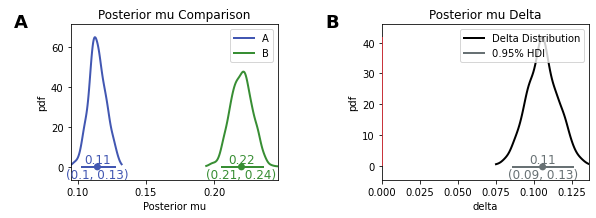

In [24]:
conversion_rate_data = counts_data.copy()

# convert to proportions
conversion_rate_data.metric = conversion_rate_data.metric / conversion_rate_data.metric.max()

conversion_rate_experiment = Experiment(data=conversion_rate_data)
conversion_rate_test = HypothesisTest(
    metric="metric",
    treatment="treatment",
    control="A", variation="B",
    hypothesis="unequal",
    variable_type='continuous',
    inference_method='bayesian'
)

conversion_rate_test_results = conversion_rate_experiment.run_test(conversion_rate_test)
conversion_rate_test_results.display()
conversion_rate_test_results.visualize()


## Configuring `spearmint`
Upon the first import of the `spearmint` creates a `spearmint.cfg` file in your `SPEARMINT_HOME` directory. This directory can be set with an environment variable

```bash
export SPEARMINT_HOME=PATH/TO/SPEARMINT
```

otherwise `spearmint` will use `/USER_HOME/.spearmint/` as the location of the configuration file. The `spearmint.cfg` file allows the scientist to configure many global settings and default behaviors.